[0, 9751, 19008, 27777, 36064, 43875, 51216, 58093, 64512, 70479, 76000, 81081, 85728, 89947, 93744, 97125, 100096, 102663, 104832, 106609, 108000, 109011, 109648, 109917, 109824, 109375, 108576, 107433, 105952, 104139, 102000, 99541, 96768, 93687, 90304, 86625, 82656, 78403, 73872, 69069, 64000, 58671, 53088, 47257, 41184, 34875, 28336, 21573, 14592, 7399, 0, -7599, -15392, -23373, -31536, -39875, -48384, -57057, -65888, -74871, -84000, -93269, -102672, -112203, -121856, -131625, -141504, -151487, -161568, -171741, -182000, -192339, -202752, -213233, -223776, -234375, -245024, -255717, -266448, -277211, -288000, -298809, -309632, -320463, -331296, -342125, -352944, -363747, -374528, -385281, -396000, -406679, -417312, -427893, -438416, -448875, -459264, -469577, -479808, -489951, -500000, -509949, -519792, -529523, -539136, -548625, -557984, -567207, -576288, -585221, -594000, -602619, -611072, -619353, -627456, -635375, -643104, -650637, -657968, -665091, -672000, -678689, -685152, -

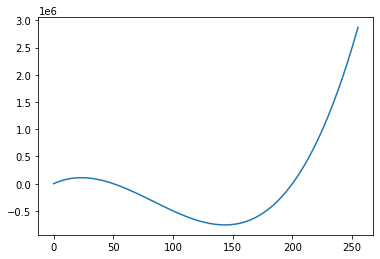

In [4]:
import matplotlib.pyplot as pyplot

def U(x):
    return x * (x-50) * (x-200)

#local minimum around 150-ish

y = []
for x in range(256):
    y.append(U(x))
    

pyplot.plot(y)
print(y)

In [12]:
# 1. Define representation: string

import random # RNJesus

n_bits = 8 # 8 bit strings: binary versions of numbers 0-255
n_pop = 10 # population size is 10 individuals
n_gen = 10 # 10 generations
p_xo = 0.8 # crossover rate
n_sel = 2

# increasing population/generation count will not necessarily lead to improvements;
# can get stuck in a local minimum/maximum.
# mutation exists to get out of a local minimum/maximum

pop = []
# have to iterate through 1 to 10 (range(0-9)), create individuals for population
for i in range(n_pop):
    pop.append("".join(random.choice('01') for j in range(n_bits)))
    # randomly concatenating 0 or 1 to the string 10 times and putting that string in pop.

    

def dec(chromosome):
    dec = 0
    chro = chromosome[::-1]
    for i in range(len(chromosome)):
        if chro[i] == '1':
            dec += 2**i
    return dec

def fitness(chromosome):
    #penalty fitness
    penalty = 0
    
    x = dec(chromosome)
    x_max = 150
    if x > x_max: #if x is greater than x_max, we apply a penalty
        penalty = (x - x_max)**3 #proportionate to how far above x_max it is
    
    
    f = U(x) - 10 * penalty
    
    return f
    #minimisation
    #return -U(dec(chromosome))
    
    #maximisation
    #return U(dec(chromosome))


def show_pop():
    print("")
    f_avg = 0
    for p in pop:
        #print(p + ' {:>3} '.format(str(dec(p)))+ str(fitness(p)))
        print_chromosome(p)
        f_avg += fitness(p)
    print("Average fitness: ", str(f_avg/n_pop))
    print('-----------------\n')
    
def print_chromosome(c):
   print(c + ' {:>3} '.format(str(dec(c)))+ str(fitness(c)))

def tournament(inverse = False):
    index = 0
    f_max = -111111111111 # initialize this to below the minimum fitness
    f_min = +111111111111
    for counter in range(n_sel):
        # cursor pointing at random member of population
        index_i = random.randint(0, len(pop)-1)
        f_i = fitness(pop[index_i])
        if inverse:
            if f_i < f_min:
                f_min = f_i
                index = index_i
        else:
            if f_i > f_max:
                f_max = f_i
                index = index_i
    return index

def mutation(chromosome):
    for i in range(n_bits):
        if random.random() < 1/n_bits:
            if chromosome[i] == '0':
                chromosome = chromosome[:i] + '1' + chromosome[i+1:]
            else:
                chromosome = chromosome[:i] + '0' + chromosome[i+1:]
    return chromosome

print("Initial population")
show_pop()

for gen in range(n_gen): # for each generation
    for ind in range(n_pop): # for each individual in population
        offspring = ""
        if random.random() < p_xo:
            #crossover
            index_individual_1 = tournament()
            index_individual_2 = tournament()
            cut = random.randint(1,n_bits-1) # random int between 1 and nbits-1
            # will be used for where we splice the offspring
            
            # and then we splice the offspring
            offspring = pop[index_individual_1][:cut] + pop[index_individual_2][cut:]            
        else:
            #cloning
            offspring = pop[tournament()]
            
        # mutation would happen here
        
        pop[tournament(True)] = mutation(offspring)
    
    print("Generation " + str(gen))
    show_pop()
 
print("Best solution: ")
print_chromosome(max(pop, key=fitness))

Initial population

10111010 186 -820704
00100110  38 73872
11011011 219 -2581881
11010111 215 -2214125
11111001 249 -7274991
01000010  66 -141504
11110010 242 -5835392
10110000 176 -707984
00101011  43 47257
00010010  18 104832
Average fitness:  -1935062.0
-----------------

Generation 0

01111010 122 -685152
00101011  43 47257
00100011  35 86625
01111000 120 -672000
11111001 249 -7274991
01000010  66 -141504
11111010 250 -7500000
10110000 176 -707984
00101011  43 47257
00010010  18 104832
Average fitness:  -1669566.0
-----------------

Generation 1

00001000   8 64512
10100011 163 -703473
00100011  35 86625
00101000  40 64000
00010111  23 109917
00010010  18 104832
11111010 250 -7500000
10110000 176 -707984
00101011  43 47257
00010010  18 104832
Average fitness:  -832948.2
-----------------

Generation 2

00010011  19 106609
00110011  51 -7599
10010000 144 -758016
00010011  19 106609
00010111  23 109917
00110011  51 -7599
00010000  16 100096
00100011  35 86625
00010011  19 106609
000